## INTRODUCTION:
* Handwriting recognition is an art of identifying characters from handwritten images. 
* Recognition of hand written images is getting more and more attention due to its wide range of applications.
* This script (Devanagari) has various characteristics like complex shape, presence of modifiers, similarity between characters which makes recognition of Devanagari characters, a difficult task.
* Character recognition techniques associate a symbolic identity with the image of a character. 
* These character images are preprocessed and then features are extracted from them.

In [1]:
# Importing necesary packages
import numpy as np
import pandas as pd
from sklearn.model_selection import GridSearchCV 
from keras.models import Sequential
from keras.layers import Dense
import warnings
warnings.filterwarnings('ignore')
from keras.wrappers.scikit_learn import KerasClassifier

from tensorflow.keras.optimizers import Adam # - Works

from keras.layers import Conv2D, Input, ZeroPadding2D, BatchNormalization, Activation, MaxPooling2D, Flatten, Dense, Dropout

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

### Now Lets Import all the CSV files & store in a Variables

In [3]:
X_train = pd.read_csv('X_train.csv')
X_train = X_train.drop(X_train.columns[0], axis = 1)
X_train = np.array(X_train)

In [4]:
Y_train = pd.read_csv('Y_train.csv')
Y_train = Y_train.drop(Y_train.columns[0], axis = 1)
Y_train = np.array(Y_train)

In [5]:
X_test = pd.read_csv('X_test.csv')
X_test = X_test.drop(X_test.columns[0], axis = 1)
X_test = np.array(X_test)

In [6]:
Y_test = pd.read_csv('Y_test.csv')
Y_test = Y_test.drop(Y_test.columns[0], axis = 1)
Y_test = np.array(Y_test)

### Reshape the Dataset

In [7]:
X_train = X_train.reshape((78200,32,32,1))
print(X_train.shape)
Y_train = Y_train.reshape((78200,1))
print(Y_train.shape)
X_test = X_test.reshape((13800,32,32,1))
print(X_test.shape)
Y_test = Y_test.reshape((13800,1))
print(Y_test.shape)

(78200, 32, 32, 1)
(78200, 1)
(13800, 32, 32, 1)
(13800, 1)


* Now in the above dataset it has Pixels values & These values are between Range on 0 to 255.
* Lets convert these value between range 0-1 to reduce computation.

In [8]:
X_train = X_train/255
X_test = X_test/255

In [9]:
from sklearn.utils import shuffle

In [10]:
X_train, Y_train = shuffle(X_train, Y_train, random_state = 2)
X_test, Y_test = shuffle(X_test, Y_test, random_state = 0)

In [11]:
import matplotlib.pyplot as plt

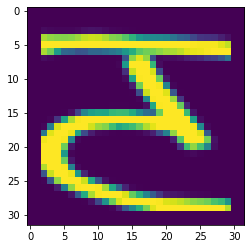

In [12]:
plt.imshow(X_test[0])

In [13]:
from sklearn.model_selection import train_test_split

* Now lets split dataset for Training & Testing

In [14]:
X_test, X_val, Y_test, Y_val = train_test_split(X_test, Y_test, test_size = 0.6, random_state = 1)
print(X_test.shape)
print(X_val.shape)

(5520, 32, 32, 1)
(8280, 32, 32, 1)


In [15]:
from keras.utils.np_utils import to_categorical

* Keras provides numpy utility library, which provides functions to perform actions on numpy arrays. 
* Using the method to_categorical(), a numpy array (or) a vector which has integers that represent different categories, can be converted into a numpy array (or) a matrix which has binary values and has columns equal to the number of categories in the data.
* it is used to convert array of labeled data(from 0 to nb_classes - 1) to one-hot vector.

In [16]:
Y_test = to_categorical(Y_test)
print(Y_test.shape)

(5520, 47)


In [17]:
Y_val = to_categorical(Y_val)
print(Y_val.shape)

(8280, 47)


In [18]:
Y_train = to_categorical(Y_train)
print(Y_train.shape)

(78200, 47)


# Hidden Layer

In [20]:
model = Sequential([
    Conv2D(64, 3, activation='relu', input_shape=(32,32,1)),
    MaxPooling2D(2, 2),
    
    Conv2D(128, 3, padding='same', activation='relu'),
    
    Conv2D(128, 3, padding='same', activation='relu'),
    Conv2D(256, 5, padding='same', activation='relu'),
    MaxPooling2D(2, 2),
    
    Conv2D(256, 5, padding='same', activation='relu'),

    Conv2D(100, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Flatten(),
    Dropout(0.5),
    Dense(512, activation='relu'),
    Dense(128, activation='relu'),
    
    Dense(47, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 15, 15, 128)       73856     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 15, 15, 128)       147584    
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 256)       819456    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 256)         0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 7, 7, 256)         1

* In the above line, We have implented our Neural Network.
* This Neural network having different Layes of Neurons , Like 64 Neurons, 128 Neurons likewise & at the output 47 Neurons.
* Activation function in Starting layes we used 'RELU' 
* And at the Last layes we used 'Softmax' Activation Function.

In [21]:
model.compile(Adam(lr = 10e-4), loss = 'categorical_crossentropy', metrics = ['accuracy'])

* Optimizer that we have used is "Adam".

### Neural Network Training
Now by using all the resources like Datasets, Hidden layes , Optimizer lets fit into model & Train a Neural Network.

In [22]:
history = model.fit(X_train, Y_train, epochs = 5, batch_size = 400, validation_data = (X_val, Y_val), verbose = 1)

Epoch 1/5
196/196 [==============================] - 1365s 7s/step - loss: 1.4431 - accuracy: 0.5992 - val_loss: 0.1738 - val_accuracy: 0.9470
Epoch 2/5
196/196 [==============================] - 1202s 6s/step - loss: 0.2212 - accuracy: 0.9328 - val_loss: 0.0865 - val_accuracy: 0.9729
Epoch 3/5
196/196 [==============================] - 1350s 7s/step - loss: 0.1224 - accuracy: 0.9631 - val_loss: 0.0667 - val_accuracy: 0.9793
Epoch 4/5
196/196 [==============================] - 3960s 20s/step - loss: 0.0834 - accuracy: 0.9751 - val_loss: 0.0551 - val_accuracy: 0.9838
Epoch 5/5
196/196 [==============================] - 1227s 6s/step - loss: 0.0632 - accuracy: 0.9805 - val_loss: 0.0387 - val_accuracy: 0.9877


In [26]:
print(model.evaluate(X_val , Y_val))# evaluate test data

259/259 [==============================] - 31s 119ms/step - loss: 0.0387 - accuracy: 0.9877
[0.038654666393995285, 0.9876811504364014]


### Accuracy we got around 98 %.

In [27]:
model.save(r'Hindi_Model') #saved the  model

INFO:tensorflow:Assets written to: Hindi_Model\assets


### Save our CNN Model 

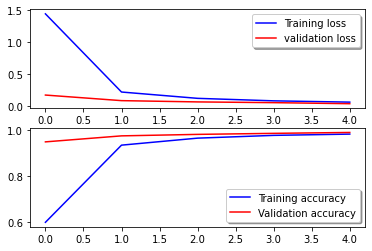

In [30]:
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)